# **Search Algorithms**




# The Environment

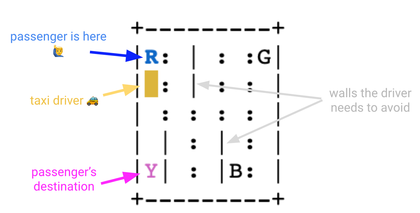




R, G, B, Y are locations on this map
The pipe symbol (|) represent walls
The colon symbol (:) represent open spaces

1.	The map is a 5x5 gridworld, leading to 25 locations.
2.	The alphabets R, G, B, Y are 4 locations.
3.	A passenger can be at any of the 4 locations.
4.	A passenger’s destination can be any of the left 3 locations.
5. The blue letter represents the current passenger pick-up location, and the purple letter is the current destination.
6.	The taxi can pass through **:** but not **|**
7.	The colon symbol **:** denotes a pass, which means, |B:a| if you’re at position **a** you can get to position **B** by going left.
8.	The pipe symbol **|** denotes a wall, which means, |Y|x: if you’re at position **x** you can’t get to position **Y** by going left.
9.	The environment rewards 20 points when a passenger is dropped to their destination.
10.	The environment penalizes -10 points if pickup operation is performed on a cell where there is no passenger.
11.	The environment penalizes -10 points if drop operation is performed if no passenger had boarded the taxi.
12.	The environment penalizes -1 for every other action.
13.	There are 500 states in this environment.

Each state answers these questions:
1.	Where is the taxi right now (one out of the 25 cells).
2.	Where is the passenger right now (one out of R,G,B,Y and the possibility of being inside the taxi).
3.	Where does the passenger want to go (one out of R,G,B,Y).

Initial conditions:
1.	At the start, the taxi will be at any of the 25 positions on the map.
2.	A passenger will be at any of R, G, B, Y locations.
3.	A destination will be at any of the R, G, B, Y locations.

Agent — Taxi

Our agent is a taxi, which can perform 6 actions:
0.	South
1.	North
2.  West
3.	East
4.	Pickup
5.	Dropoff

Expected behaviour

1.	The taxi must find the passenger traveling the shortest path.
2.	The taxi must pickup the passenger.
3.	The taxi must find the shortest path to the passenger’s destination.
4.	Drop the passenger at their destination traversing the shortest path


**imports and useful libraries**

In [2]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output # Used to clear the ouput of a Jupyter cell.
from queue import Queue                  # Used in the implementation of BFS 
import heapq                             # Used in the implementation of A*

### **Initialize the environment and display the  initial state**

In [3]:
env = gym.make('Taxi-v3').env
state = env.reset()
env.s = 328
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
# Constants
UNLIMITED_DEPTH = -1
PASS_IN_TAXI = 4

## **auxiliary functions and classes**

In [5]:
def print_frames(frames: list) -> None:
    """
    print_frames - print list of frames (path):
    arg:
      1. frames  - list of frames
    """
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        time.sleep(0.3)

In [6]:
class Node:
    """
    Node - node represent a state:
    arg:
       1. frame  - renderd frame of state
       2. state  - the actual state
       3. action - prev action 
       4. reward - prev action reward
       5. parent - prev node (state)
       6. depth  - depth of node (state)
    """
    def __init__(self, frame=None, state=None, action=None,
                 reward=None, parent=None, depth=0):
        self.frame = frame
        self.state = state
        self.action = action
        self.reward = reward
        self.parent = parent
        self.depth = depth
    # for equak-break - useless
    def __lt__(self, other):
        return False

def getNeigbours(node: Node) -> list:
    """
    getNeigbours - returns sets of nodes we can reach from a given node:
    arg:
      1. node    - current node
    return:
       List of reachable nodes from current node
    """
    env.s = node.state
    neighbours = []
    for action in range(6):
        new_state, reward, done, info = env.step(action) # Take action i
        new_node = Node(env.render(mode='ansi'), new_state ,action ,
                        reward, node, node.depth + 1)
        neighbours.append(new_node)
        env.s = node.state
    return neighbours

In [7]:
def get_path(node: Node) -> tuple:
    """
    get_path - returns the path of given node and reward:
    arg:
      1. node  - final node
    return:
       Tuple - (frames to final node, reward to final node)
    """
    total_reward = 0
    frames = []
    while node is not None:
        frames.append({
              'frame': node.frame,
              'state': node.state,
              'action': node.action,
              'reward': node.reward
              }
        )
        total_reward += node.reward
        node = node.parent

    return (frames[::-1], total_reward)

# **Breadth-First Search - BFS Algorithm (in Graph)**
- Comlete: yes, always find the a solution
- Optimal: yes, always find the best solution
- Time Complexity: O(b^s), when:
    1. b - branching factor
    2. s - tier of best the solution
    
- Space Complexity: O(b^s)


In [65]:
def bfs(first_state: int) -> tuple:
    """
    bfs - Breadth-First Search Algorithm:
    arg:
       1. first_state        - first state
    return:
       Tuple of (frames of optimal solution, reward of optimal solution)
    """
    # set environment to illustration's state
    env.s = first_state 
    # set of states weve visited in before
    visited = set()
    # queue of opened nodes 
    queue = Queue()
  
    queue.put(Node(env.render(mode='ansi'), env.s, None, 0))
    visited.add(env.s)
    # will store final node
    final_node = None

    while queue.qsize():
        curr_node = queue.get()
        # if curr is final state
        if curr_node.reward == 20:
            final_node = curr_node
            break

        for neigbour in getNeigbours(curr_node):
            if neigbour.state not in visited: 
                visited.add(neigbour.state)
                queue.put(neigbour)

    # Found Solution
    if final_node is not None:
        return get_path(final_node)

    # No Solution
    return (None, None)
"""
env.s = 328
frames,reward = bfs(env.s)
print_frames(frames)
print(reward)
"""

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 10
State: 410
Action: 5
Reward: 20
12


# **Limited Depth-First Search - DFS-L Algorithm (in Tree)**
- Comlete: no, solution might be deeper than *l*
- Optimal: no, optimal solution might be deeper than *l*
- Time Complexity: O(b^l), when:
    1. b - branching factor
    2. l - depth limitation
    
- Space Complexity: O(b*l)


In [56]:
def dfs_l(first_state: int, depth: int) -> tuple:
    """
    dfs_l - Limited Depth-First Search Algorithm:
    arg:
       1. first_state   - first state
       2. depth         - depth limit
    return:
       Tuple of (frames of solution, reward of solution), if found
    """
    # set environment to illustration's state
    env.s = first_state 
    # stack of opened nodes
    stack = [Node(env.render(mode='ansi'), env.s, None, 0)]
    # will store final node
    final_node = None
    while stack and not final_node:
        curr_node = stack.pop(-1)

        for neigbour in getNeigbours(curr_node):
            if neigbour.reward == 20:
                final_node = neigbour
                break
            if not curr_node.state == neigbour.state and                 \
               (depth == UNLIMITED_DEPTH or neigbour.depth <= depth):
                    stack.append(neigbour)

    if final_node is not None:
        return get_path(final_node)

    # No Solution
    return (None, None)

## **Comparison Between Different Initiale Depths - L**

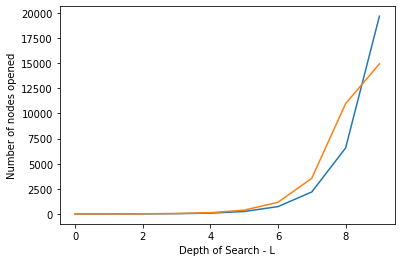

In [19]:
"""
from matplotlib import pyplot as plt
import numpy as np


x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 4, 13, 40, 123, 376, 1159, 3550, 10976, 14944]


plt.plot(x , eval('np.power(3, x)'), label = "3^x")
plt.plot(x, y, label = "nodes opened")
plt.xlabel("Depth of Search - L")
plt.ylabel("Number of nodes opened")
plt.show()
"""

# **Depth-First Search - DFS Algorithm (in Tree)**
- Comlete: no, can be stuck in a loop
- Optimal: no, can be stuck in a loop
- Time Complexity: O(b^m), when:
    1. b - branching factor
    2. m - tier of first solution it sees ("leftmost") solution
    
- Space Complexity: O(b*m)


In [17]:
def dfs(first_state: int) -> tuple:
    """
    dfs - Depth-First Search Algorithm:
    arg:
       1. first_state   - first state
    return:
       Tuple of (frames of solution, reward of solution), if found
    """
    # use dfs-l without limitation of depth
    return dfs_l(first_state, UNLIMITED_DEPTH)

"""
env.s = 328
frames,reward = dfs(env.s)
print_frames(frames)
print(reward)
"""

'\nenv.s = 328\nframes,reward = dfs(env.s)\nprint_frames(frames)\nprint(reward)\n'

# **Iterative Deepening Depth-First Search - ID-DFS Algorithm (in Tree)**
- Comlete: yes, always find the a solution
- Optimal: yes, always find the best solution
- Time Complexity: O(b^s), when:
    1. b - branching factor
    2. s - tier of best the solution
    
- Space Complexity: O(b*s)


In [57]:
def id_dfs(first_state: int, init_depth: int) -> tuple:
    """
    id_dfs - Iterative Deepening Depth-First Search Algorithm:
    arg:
       1. first_state   - first state
       2. init_depth    - initiale depth limit
    return:
       Tuple of (frames of optimal solution, reward of optimal solution)
    """
    # initial depth of search
    i = init_depth
    # search until solution found
    while True:
        # use dfs-l with depth limitation of i
        frames, reward = dfs_l(first_state, i)
        # return a solution if found one
        if frames is not None:
            return (frames, reward)
        # no solution in depth i 0 increase i
        i += 1

"""
env.reset()
env.s = 328
initial_depth = 0
frames, reward = id_dfs(env.s, initial_depth)
try:
    print_frames(frames)
except TypeError as e:
    print("no")
print(reward)
"""

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 11
State: 0
Action: 5
Reward: 20
11


# **Weighted-A* Search - W-A* Algorithm (in Tree)**
- Comlete: yes, always find the a solution
- Optimal: yes, always find the best solution
- Time Complexity: O(b^s), when:
    1. b - branching factor
    2. s - tier of best the solution
    
- Space Complexity: O(b*s)


In [8]:
class A_Node(Node):
    """
    A_Node - A* node represent a state:
    arg:
       1. frame  - renderd frame of state
       2. state  - the actual state
       3. action - prev action 
       4. reward - prev action reward
       5. parent - prev node (state)
       6. depth  - depth of node (state)
       7. g_val  - accumulate value of the state
    """
    def __init__(self, frame=None, state=None, action=None,
              reward=0, parent=None, depth=0, g_val=0):
        super(A_Node, self).__init__(frame, state, action, reward, parent, depth)
        self.g_val = g_val

In [9]:
def null_h(state: int) -> int:
    """
    Null Heuristic:
    arg:
        1. state - current state
    return: 0
    """
    return 0

def chosen_h(state: int) -> int:
    """
    Manhattan Sum Heuristic:
    arg:
        1. state - Current state
    return:
        h(s) = ManhattanDistance(s, loc_of_passenger) + ManhattanDistance(loc_of_passenger, loc_of_drop)
    """
    taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
    if pass_idx == PASS_IN_TAXI:
        pass_row, pass_col = taxi_row, taxi_col
    else:
        pass_row, pass_col = env.locs[pass_idx]
    dest_row, dest_col = env.locs[dest_idx]
    return (abs(pass_row - taxi_row) + abs(pass_col - taxi_col)) + (abs(pass_row - dest_row) + abs(pass_col - dest_col))


def get_weight(weight: int, h_value: int, g_value: int) -> int:
    """
    get_weight - Calculate the f weight (priorety):
    arg:
      1. weight  - weight given to A*
      2. h_value - value given by the chosen heuristic
      3. g_value - accumulate value of the state
    return:
       f function: f(x) = (1-w)*g(n)+w*h(n)
    """
    return ((1 - weight) * g_value) + (weight * h_value)

def find_by_state(lst: list, state: int) -> tuple:
    """
    find_by_state - Search List/Queue to find state:
    arg:
       1. lst   - list/queue to search in
       2. state - state to find
    return:
       Tuple of (node of the state in the list, index of the state in the list)
    """
    index = 0
    for i in lst:
        if i[-1].state == state:
            return i[-1], index
        index += 1
    return None, None

In [11]:
def weighted_a_star(first_state: int, weight: int, heuristic_function) -> tuple:
    """
    weighted_a_star - Weighted-A* Search Algorithm:
    arg:
       1. first_state        - first state
       2. weight             - weight for f (priorety) calc
       3. heuristic_function - chosen heuristic
    return:
       Tuple of (frames of optimal solution, reward of optimal solution)
    """
    # set environment to illustration's state
    env.s = first_state 
    # priorety queue of nodes weve still working on - sorted by the f function
    open_list   = [(get_weight(weight, heuristic_function(first_state), 0), A_Node(env.render(mode='ansi'), env.s))]
    # dict of state: nodes weve visited in before
    closed_list = {}
    # will store the solution 
    final_node = None
    
    while open_list:
        # pop the best (lowest) valued node from the open nodes list (priorety queue)
        _, curr_node = heapq.heappop(open_list)
        closed_list[curr_node.state] = curr_node

        # were find the best path to the final state
        if curr_node.reward == 20:
            final_node = curr_node
            break
        
        for neigbour in getNeigbours(curr_node):
            # small optimization - wont count awful moves
            if (neigbour.action == 5 and neigbour.reward == -10) \
               or (neigbour.action == 4 and neigbour.reward == -10)  \
               or curr_node.state == neigbour.state:
               continue              

            # new accumulate g value so far to neigbour
            new_g_value = curr_node.g_val + neigbour.reward

            # if neigbour already in open list
            neigbour_in_open, index = find_by_state(open_list, neigbour.state)
            if neigbour_in_open is not None:
                if new_g_value > neigbour_in_open.g_val:
                    neigbour_in_open.action = neigbour.action
                    neigbour_in_open.reward = neigbour.reward
                    neigbour_in_open.parent = neigbour.parent
                    neigbour_in_open.g_val  = new_g_value
                    del open_list[index]
                    heapq.heapify(open_list)
                    heapq.heappush(open_list ,(get_weight(weight, heuristic_function(neigbour.state), new_g_value), neigbour_in_open))
            
            # if neigbour already in closed list
            neigbour_in_closed = None
            try: 
                neigbour_in_closed = closed_list[neigbour.state]
            except KeyError:
                pass
            if neigbour_in_closed is not None:
                if new_g_value > neigbour_in_closed.g_val:
                    neigbour_in_closed.action = neigbour.action
                    neigbour_in_closed.reward = neigbour.reward
                    neigbour_in_closed.parent = neigbour.parent
                    neigbour_in_closed.g_val  = new_g_value
                    heapq.heappush(open_list, (get_weight(weight, heuristic_function(neigbour.state), new_g_value), neigbour_in_closed))
                    del closed_list[neigbour.state]
            
            # if neigbour not in any of the lists
            if neigbour_in_closed is None and neigbour_in_open is None:
                neigbour.g_val = new_g_value
                heapq.heappush(open_list, (get_weight(weight, heuristic_function(neigbour.state), new_g_value), neigbour))
    
    # Found Solution
    if final_node is not None:
        return get_path(final_node)

    # No Solution
    return (None, None)

# driver code - for your use only, do not submit these lines!
env.s = 328
weight = 0.5   # you will need to change this during the excersize 
#frames,reward = frames = weighted_a_star(env.s,weight,admissible_h)
frames,reward = weighted_a_star(env.s,weight,chosen_h)
print_frames(frames)
print(reward)

#frames,reward = frames = weighted_a_star(env.s,weight,non_admissible_h)
#print_frames(frames)
#print(reward)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 11
State: 0
Action: 5
Reward: 20
11
